In [8]:
import os 
import pandas as pd
import gzip
import matplotlib.pyplot as plt

In [7]:
# ---------- helper functions ----------

def count_fastq_reads(path):
    """Count reads in .fastq or .fastq.gz by line counting / 4."""
    if path.endswith(".gz"):
        opener = gzip.open
        mode = "rt"
    else:
        opener = open
        mode = "r"
    
    line_count = 0
    with opener(path, mode) as f:
        for _ in f:
            line_count += 1
    return line_count // 4


def list_fastqs(directory):
    """Return sorted list of FASTQ filenames in a directory."""
    return sorted([
        f for f in os.listdir(directory)
        if f.endswith(".fastq") or f.endswith(".fastq.gz")
    ])


# ---------- your directories ----------
dir1 = "20251015_fastqs/"
dir2 = "assembled/"

files1 = list_fastqs(dir1)
files2 = list_fastqs(dir2)

# Pad shorter list so dataframe is rectangular
max_len = max(len(files1), len(files2))
files1 += [None] * (max_len - len(files1))
files2 += [None] * (max_len - len(files2))

# ---------- create initial dataframe ----------
df = pd.DataFrame({
    "dir1_files": files1,
    "dir2_files": files2
})

# ---------- add read counts ----------
df["dir1_counts"] = df["dir1_files"].apply(
    lambda x: count_fastq_reads(os.path.join(dir1, x)) if x is not None else None
)

df["dir2_counts"] = df["dir2_files"].apply(
    lambda x: count_fastq_reads(os.path.join(dir2, x)) if x is not None else None
)

df


,dir1_files,dir2_files,dir1_counts,dir2_counts
0,20250513_oligo_order_KP_S17.assembled.fastq,20250513_oligo_order_KP_S17.assembled.fastq,166528.0,106252
1,AH_Tile_F10_S20.assembled.fastq,AH_Tile_F10_S20.assembled.fastq,95188.0,80886
2,AH_Tile_F11_S21.assembled.fastq,AH_Tile_F11_S21.assembled.fastq,213994.0,156474
3,AH_Tile_F2_S22.assembled.fastq,AH_Tile_F2_S22.assembled.fastq,146.0,570
4,AH_Tile_F3_S23.assembled.fastq,AH_Tile_F3_S23.assembled.fastq,84.0,584
...,...,...,...,...
248,None,TANGO2_Tile5_S219.assembled.fastq,NaN,413459
249,None,TANGO2_Tile6_S220.assembled.fastq,NaN,478446
250,None,TRIO_tile_lib_S13.assembled.fastq,NaN,97723
251,None,circRNA_architectures_current_hairpin_only_fin...,NaN,97578


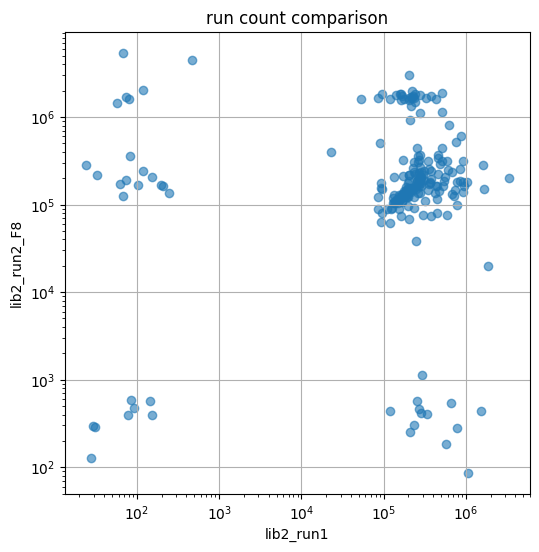

In [11]:

plt.figure(figsize=(6,6))
plt.scatter(df["dir1_counts"], df["dir2_counts"], alpha=0.6)

plt.xscale("log")
plt.yscale("log")

plt.xlabel("lib2_run1")
plt.ylabel("lib2_run2_F8")
plt.title("run count comparison")

plt.grid(True)
plt.show()